<a href="https://colab.research.google.com/github/somi216/semiconductor/blob/main/Tensorflow_MNIST_%EB%B0%98%EB%8F%84%EC%B2%B4_1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 데이터 전처리
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
# 픽셀 값을 0~1 사이로 정규화
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# CNN 모델 구성
model = models.Sequential([
    # 첫 번째 합성곱 층
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 두 번째 합성곱 층
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 세 번째 합성곱 층
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Dense 층을 위한 Flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 학습
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8900 - loss: 0.3592 - val_accuracy: 0.9781 - val_loss: 0.0662
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0501 - val_accuracy: 0.9866 - val_loss: 0.0392
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9890 - val_loss: 0.0330
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9919 - val_loss: 0.0246
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9906 - val_loss: 0.0300


In [ ]:
# 테스트 세트에서 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n테스트 정확도: {test_acc:.3f}')

313/313 - 0s - 1ms/step - accuracy: 0.9906 - loss: 0.0300

테스트 정확도: 0.991


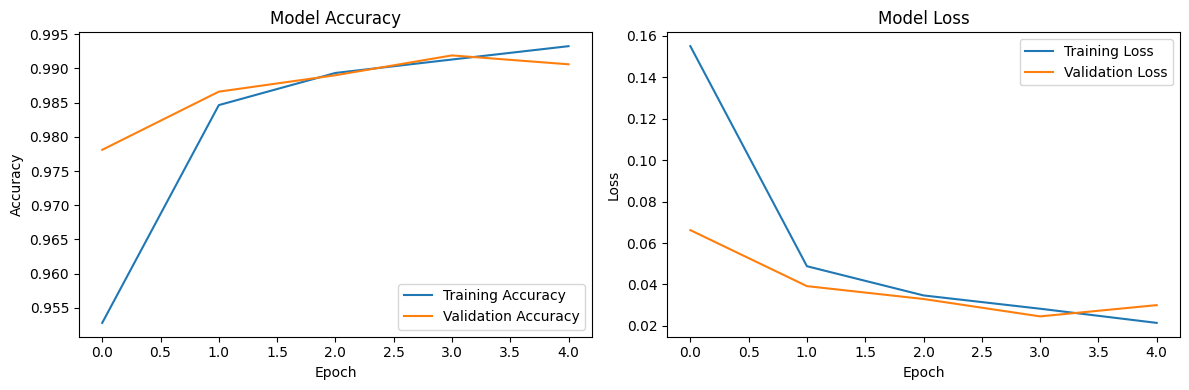

In [ ]:
# 1. 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


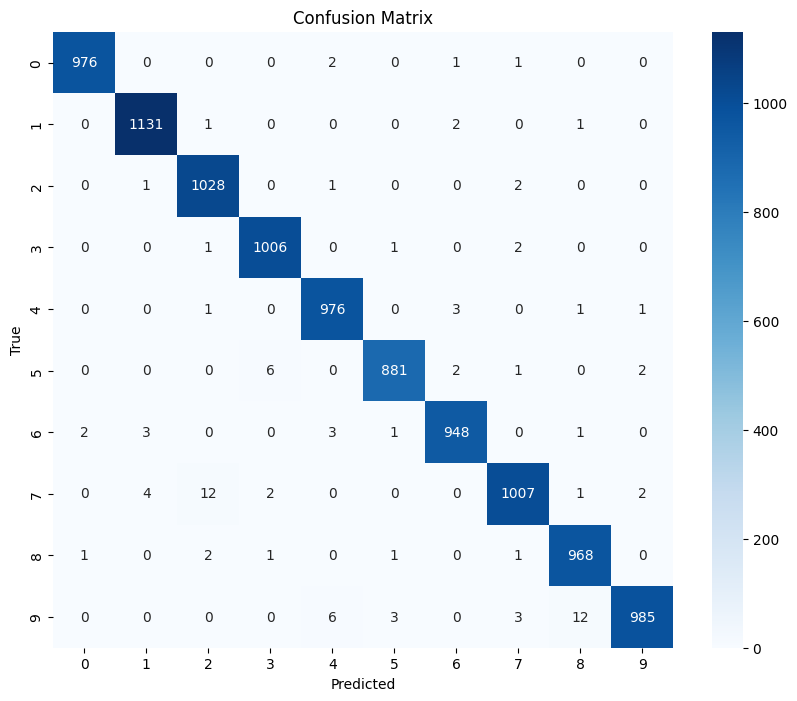

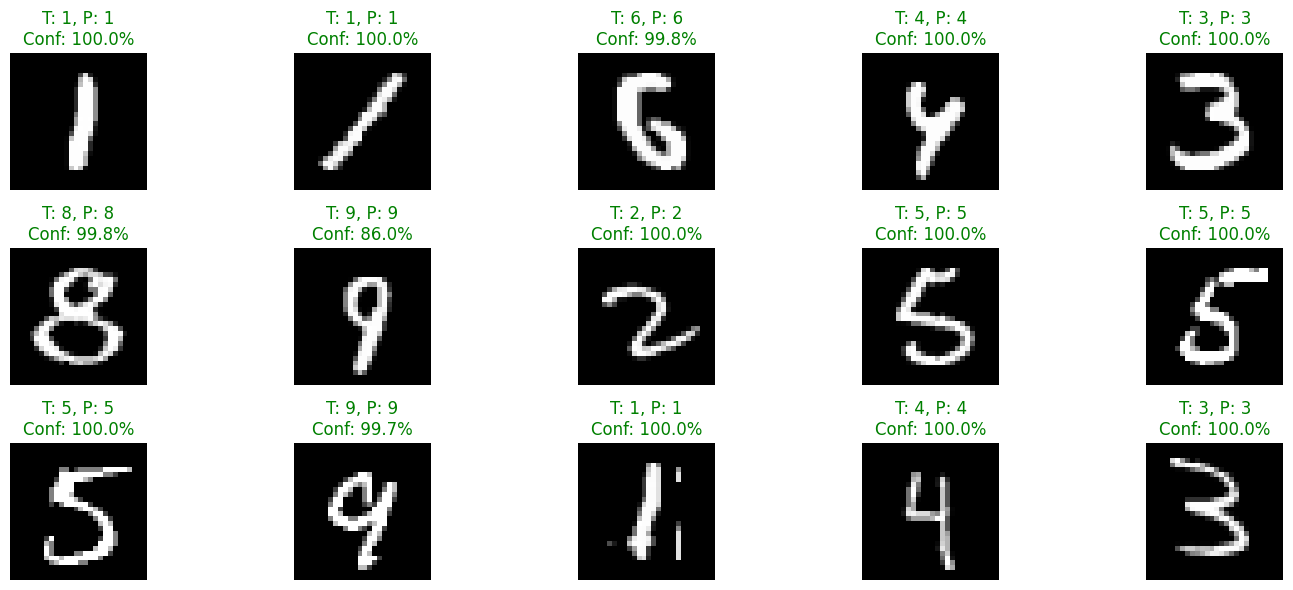

In [ ]:
# 2. 예측 결과 시각화
# 테스트 세트에서 예측 수행
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix 계산
cm = confusion_matrix(test_labels, predicted_labels)

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 3. 예측 샘플 시각화
# 랜덤하게 샘플 선택
num_samples = 15
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 5, i + 1)

    # 원본 이미지가 3채널이므로 첫 번째 채널만 사용
    plt.imshow(test_images[idx][:,:,0], cmap='gray')

    true_label = test_labels[idx]
    pred_label = predicted_labels[idx]
    confidence = predictions[idx][pred_label] * 100

    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f'T: {true_label}, P: {pred_label}\nConf: {confidence:.1f}%',
             color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

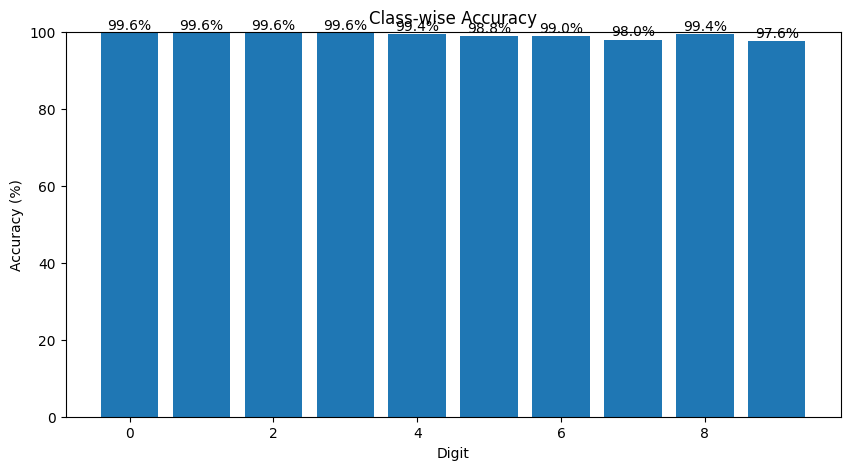

In [ ]:
# 4. 클래스별 정확도 계산 및 시각화
class_accuracy = np.zeros(10)
for i in range(10):
    mask = test_labels == i
    class_accuracy[i] = (predicted_labels[mask] == test_labels[mask]).mean() * 100

plt.figure(figsize=(10, 5))
plt.bar(range(10), class_accuracy)
plt.title('Class-wise Accuracy')
plt.xlabel('Digit')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, acc in enumerate(class_accuracy):
    plt.text(i, acc + 1, f'{acc:.1f}%', ha='center')
plt.show()

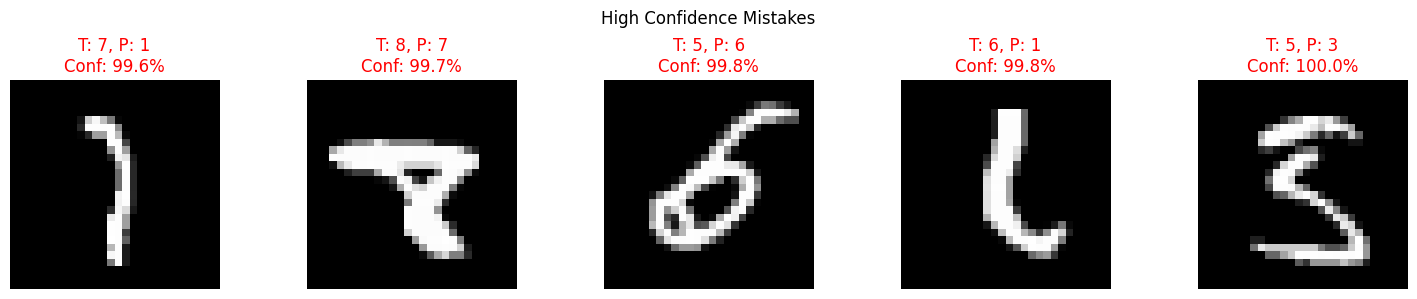

In [ ]:
# 5. 오분류된 샘플 중 확신도가 높은 케이스 분석
incorrect_mask = predicted_labels != test_labels
incorrect_confidence = predictions[incorrect_mask].max(axis=1)
incorrect_indices = np.where(incorrect_mask)[0]

# 확신도가 가장 높은 오분류 샘플 5개 선택
top_confident_errors = incorrect_indices[np.argsort(incorrect_confidence)[-5:]]

plt.figure(figsize=(15, 3))
for i, idx in enumerate(top_confident_errors):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[idx][:,:,0], cmap='gray')
    true_label = test_labels[idx]
    pred_label = predicted_labels[idx]
    confidence = predictions[idx][pred_label] * 100
    plt.title(f'T: {true_label}, P: {pred_label}\nConf: {confidence:.1f}%',
             color='red')
    plt.axis('off')

plt.suptitle('High Confidence Mistakes')
plt.tight_layout()
plt.show()

In [ ]:
# 6. 결과 요약 출력
print("\n=== 모델 성능 요약 ===")
print(f"전체 테스트 정확도: {test_acc:.3f}")
print("\n클래스별 정확도:")
for i, acc in enumerate(class_accuracy):
    print(f"숫자 {i}: {acc:.1f}%")

print("\n가장 많이 혼동되는 숫자 쌍 (상위 3개):")
# Confusion matrix에서 대각선(올바른 예측)을 제외한 가장 큰 값들 찾기
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)
for _ in range(3):
    max_idx = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)
    print(f"숫자 {max_idx[0]} → 숫자 {max_idx[1]}: {cm[max_idx[0], max_idx[1]]} 건")
    cm_no_diag[max_idx[0], max_idx[1]] = 0


=== 모델 성능 요약 ===
전체 테스트 정확도: 0.989

클래스별 정확도:
숫자 0: 99.5%
숫자 1: 100.0%
숫자 2: 98.9%
숫자 3: 98.1%
숫자 4: 99.3%
숫자 5: 98.3%
숫자 6: 99.1%
숫자 7: 99.0%
숫자 8: 99.5%
숫자 9: 97.0%

가장 많이 혼동되는 숫자 쌍 (상위 3개):
숫자 9 → 숫자 8: 11 건
숫자 3 → 숫자 5: 7 건
숫자 9 → 숫자 7: 7 건
